In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
g=9.8
L= 1
theta_0=math.radians(5)
theta_v0=0.5

In [19]:
N=10000
tfinal=10
theta_t = np.empty(N)
theta_t[0]=theta_0
theta_vt = np.empty(N)
theta_vt[0]=theta_v0
xt= np.empty(N)
xt[0]=math.sin(theta_t[0])*L
yt= np.empty(N)
yt[0]=math.cos(theta_t[0])*L
t = np.empty(N)
t[0] = 0
dt=tfinal/N
maximum = []
minimum = []
period_list = []
amp_list = []

In [20]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [21]:
def acelera(t, x, vx):
    return -g/L * np.sin(x)

def rk4_x_vx(t, x, vx, acelera, dt):
    ax1 = acelera(t, x, vx)
    c1v = ax1 * dt
    c1x = vx * dt

    ax2 = acelera(t + dt/2., x + c1x/2., vx + c1v/2.)
    c2v = ax2 * dt
    c2x = (vx + c1v/2.) * dt

    ax3 = acelera(t + dt/2., x + c2x/2., vx + c2v/2.)
    c3v = ax3 * dt
    c3x = (vx + c2v/2.) * dt

    ax4 = acelera(t + dt, x + c3x, vx + c3v)
    c4v = ax4 * dt
    c4x = (vx + c3v) * dt

    xp = x + (c1x + 2*c2x + 2*c3x + c4x) / 6.
    vxp = vx + (c1v + 2*c2v + 2*c3v + c4v) / 6.
    return xp, vxp
    


In [22]:
for i in range(N-1):
    theta_t[i+1], theta_vt[i+1] = rk4_x_vx(t[i], theta_t[i], theta_vt[i], acelera, dt)
    t[i+1]= t[i] + dt

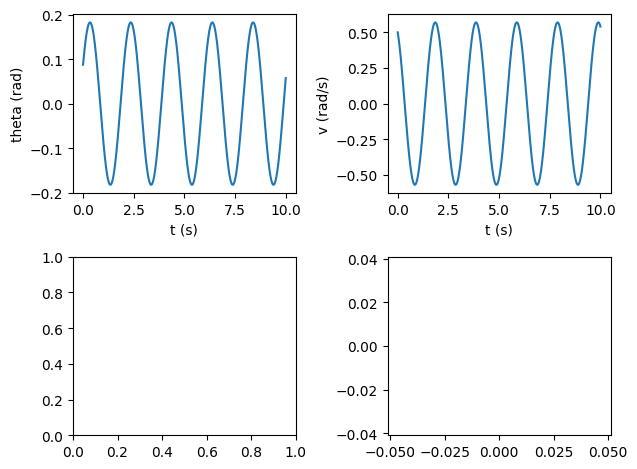

In [23]:
figure, axis = plt.subplots(2,2)
axis[0,0].plot(t, theta_t, linestyle="-")
axis[0,0].set_xlabel("t (s)")
axis[0,0].set_ylabel("theta (rad)")
axis[0,1].plot(t, theta_vt, linestyle="-")
axis[0,1].set_xlabel("t (s)")
axis[0,1].set_ylabel("v (rad/s)")
plt.axis('equal')
figure.tight_layout()

In [24]:
def find_maximums(val_list):
    retlist = []
    for i in range(1,len(val_list)-1):
        if val_list[i]>val_list[i-1] and val_list[i]>val_list[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = val_list[i-1], val_list[i], val_list[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            retlist.append([i, xm, xmax])
    return retlist

In [25]:
maximum = find_maximums(theta_t)
def calculate_period():
    for i in range(1, len(maximum)):
        period_list.append(maximum[i][0]*dt-maximum[i-1][0]*dt)
    estimated_period= (sum(period_list)/len(period_list))
    return estimated_period

T = calculate_period()
print(T)

2.01125
